### SVM_Classification_(non-linear)

Step 1: Data Load လုပ်ခြင်းနှင့် Feature များ သီးခြားခွဲထုတ်ခြင်း (Data Loading & Feature Selection)

In [ ]:
import pandas as pd

# Data Load လုပ်ခြင်း
df = pd.read_csv(r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day07 SVM\example\heart_(SVM).csv')
X = df.drop('target', axis=1)
y = df['target']

Step 2: Data ကို အုပ်စုခွဲခြင်း (Train/Test Split)

In [ ]:
from sklearn.model_selection import train_test_split

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: အချက်အလက်များကို စံသတ်မှတ်ချက်အတွင်း ညှိယူခြင်း (Feature Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling (RBF Kernel အတွက် Distance calculation က အရေးကြီးလို့ Scaling မဖြစ်မနေလုပ်ရပါမယ်)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 4: Non-linear SVM Model တည်ဆောက်ခြင်း (RBF Kernel Building & Training)
-   ယခုအဆင့်မှာတော့ မျဉ်းဖြောင့်နဲ့ ခွဲခြားရခက်တဲ့ Data တွေကို ပိုမိုရှုပ်ထွေးတဲ့ နည်းလမ်းနဲ့ ခွဲခြားနိုင်ဖို့ RBF (Radial Basis Function) Kernel ကို အသုံးပြုပြီး Model တည်ဆောက်မှာ ဖြစ်ပါတယ်။

In [ ]:
from sklearn.svm import SVC

# Non-linear SVM Model တည်ဆောက်ခြင်း (RBF Kernel)
# C နဲ့ gamma ကို ပြောင်းလဲပြီး Model ရဲ့ တိကျမှုကို ထိန်းညှိနိုင်ပါတယ်
nonlinear_model = SVC(kernel='rbf', C=2.0, gamma='scale') 
nonlinear_model.fit(X_train, y_train)

SVC(C=2.0)

Step 5: Non-linear Model ၏ တိကျမှုကို စစ်ဆေးခြင်း (RBF Model Evaluation)

In [ ]:
from sklearn.metrics import accuracy_score

# ရလဒ်ထုတ်ကြည့်ခြင်း
y_pred = nonlinear_model.predict(X_test)
print("--- Non-linear SVM (RBF) Result ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")

--- Non-linear SVM (RBF) Result ---
Accuracy Score: 92.20%



Step 6: RBF Kernel အတွက် အရေးပါသော အချက်အလက်များကို ရှာဖွေခြင်း (Permutation Importance)
-   Non-linear SVM (RBF) မှာ Linear model တွေလို coef_ ကို တိုက်ရိုက်သုံးလို့မရတဲ့အတွက် Permutation Importance နည်းလမ်းကို အသုံးပြုပြီး ဘယ် Feature တွေက Model ရဲ့ Accuracy အပေါ် အသက်ရောက်ဆုံးလဲဆိုတာကို တိုင်းတာခြင်း ဖြစ်ပါတယ်။

In [16]:
from sklearn.inspection import permutation_importance

# n_repeats=10 သည် feature တစ်ခုချင်းစီကို ၁၀ ကြိမ် shuffle လုပ်ပြီး ပျမ်းမျှယူမှာဖြစ်ပါတယ်
result = permutation_importance(nonlinear_model, X_test, y_test, n_repeats=10, random_state=42)

Step 7: RBF Model ၏ အရေးပါသော အချက်အလက်များကို ပုံဖော်ခြင်း (Non-linear Feature Visualization)

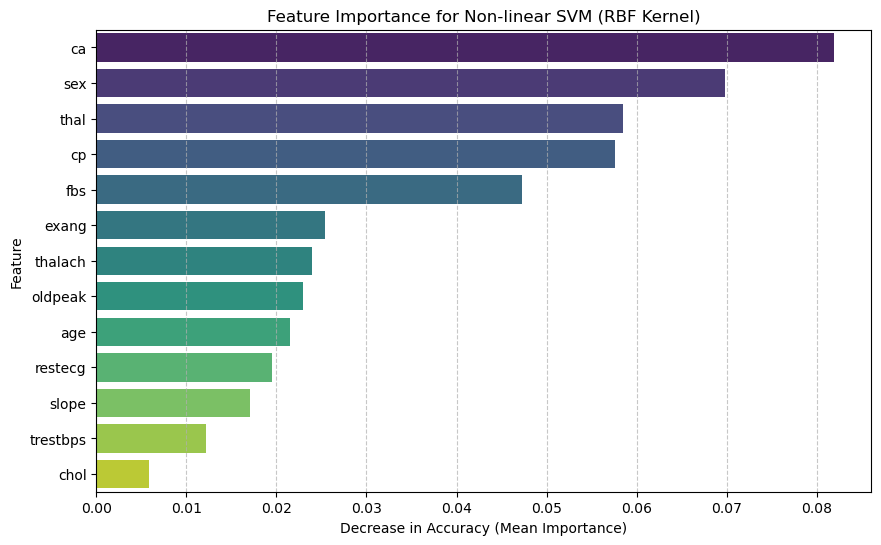

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ရလဒ်များကို DataFrame ထဲထည့်ပြီး စီခြင်း
svm_importance_df = pd.DataFrame({
    'Feature': X.columns, 
    'Importance': result.importances_mean
})
svm_importance_df = svm_importance_df.sort_values(by='Importance', ascending=False)

# 8. Visualization လုပ်ခြင်း
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=svm_importance_df, 
    hue='Feature', 
    palette='viridis', 
    legend=False
)

plt.title('Feature Importance for Non-linear SVM (RBF Kernel)')
plt.xlabel('Decrease in Accuracy (Mean Importance)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Step 8: အရေးပါသော အချက်အလက်များကို ဇယားဖြင့် အသေးစိတ်ကြည့်ရှုခြင်း (Permutation Importance Table)

In [13]:
# ရလဒ်ကို ဇယားပုံစံဖြင့် print ထုတ်ကြည့်ခြင်း
print("--- Permutation Importance Table ---")
print(svm_importance_df)

--- Permutation Importance Table ---
     Feature  Importance
1        sex    0.083902
2         cp    0.078537
11        ca    0.073171
12      thal    0.052195
8      exang    0.050244
5        fbs    0.043415
10     slope    0.041951
6    restecg    0.038049
7    thalach    0.025854
3   trestbps    0.023415
0        age    0.021463
9    oldpeak    0.019024
4       chol    0.005366
